In [1]:
import h5py 

In [2]:
import os.path as path

In [3]:
filename = 'data/simulacra/sim_full_lr120000.0_s20_e5_v30_ep0.0001_g1.0_w1.0_a4.h5'
filetail = path.split(filename)[1][:-3]
f = h5py.File(filename,'r+')

In [4]:
tbl_theory = f['theory']
tbl_samples = f['samples']

In [5]:
epoch_idx = 1
lamb = f['samples']['wavelength']
flux = f['samples']['flux']
ferr = f['samples']['flux_error']

In [6]:
lamb_theory = f['theory']['wavelength']
flux_stellar = f['theory']['flux_stellar']
flux_tellurics = f['theory']['flux_tellurics']
flux_gas = f['theory']['flux_gas']

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_epoch(epoch_idx,lamb,f,ferr,lamb_theory=None,f_star=None,f_tell=None,f_gas=None):
    plt.figure(figsize=(20,8))
    plt.title('wobble toy data')
    plt.xlabel('$\lambda_{%i}$' % epoch_idx)
    plt.ylabel('$f_{%i}$' % epoch_idx)
    if f_star is not None:
        plt.plot(lamb_theory,f_star[epoch_idx,:],'red',alpha=0.5,label='star')
    if f_tell is not None:
        plt.plot(lamb_theory,f_tell[epoch_idx,:],'blue',alpha=0.5,label='telluric')
    if f_gas is not None:
        plt.plot(lamb_theory,f_gas,'green',alpha=0.5,label='gas cell')
    plt.errorbar(lamb,f[epoch_idx,:],ferr[epoch_idx,:],fmt='.k',elinewidth=0.7,zorder=1,alpha=0.4,ms=6,label='data')
#     plt.legend()

In [9]:
flux_gas.shape

(293706,)

In [10]:
import dataset as wobble_data
import numpy as np

In [11]:
lamb, flux = np.array(lamb), np.array(flux)
lamb_theory, flux_stellar,flux_tellurics, flux_gas = np.array(lamb_theory), np.array(flux_stellar), np.array(flux_tellurics), np.array(flux_gas)

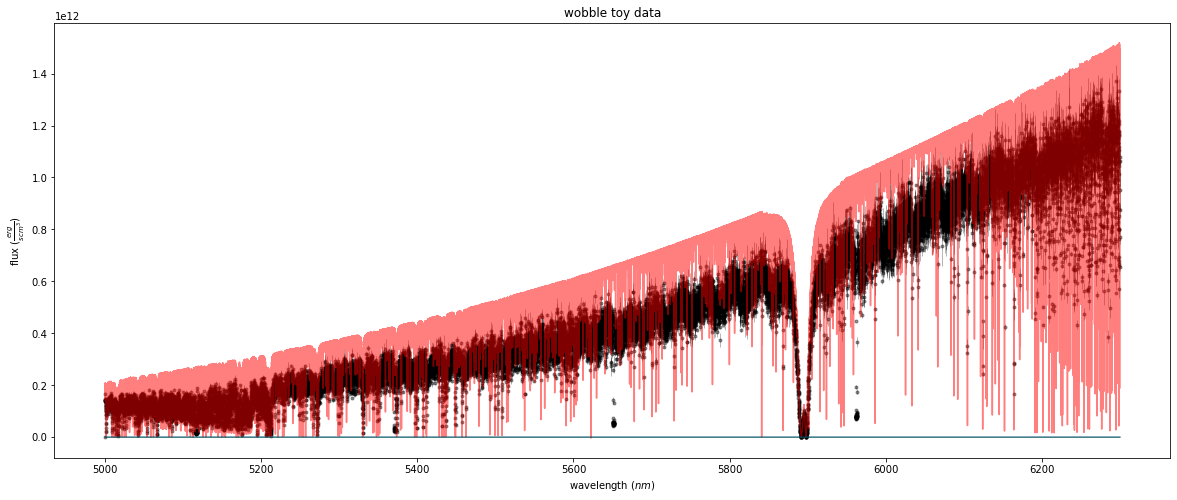

In [12]:
epoch_idx = 0
plot_epoch(epoch_idx,lamb,flux,ferr,lamb_theory,flux_stellar,flux_tellurics,flux_gas)
# plt.ylim(0,4e27)
plt.ylabel('flux ($\\frac{erg}{s cm^3}$)')
plt.xlabel('wavelength ($nm$)')
plt.show()

In [13]:
sigma = 80
flux_norm  = wobble_data.normalize_flux(flux,sigma)

x, y, yerr = np.log(lamb), np.log(flux_norm), ferr/flux
flux_stellar_norm = wobble_data.normalize_flux(flux_stellar,sigma)
x_the, y_star, y_tell, y_gas = np.log(lamb_theory), np.log(flux_stellar_norm), np.log(flux_tellurics), np.log(flux_gas)

<ipython-input-13-6b2e6c59741c>:4: RuntimeWarning: divide by zero encountered in log
  x, y, yerr = np.log(lamb), np.log(flux_norm), ferr/flux
<ipython-input-13-6b2e6c59741c>:4: RuntimeWarning: invalid value encountered in true_divide
  x, y, yerr = np.log(lamb), np.log(flux_norm), ferr/flux
<ipython-input-13-6b2e6c59741c>:6: RuntimeWarning: invalid value encountered in log
  x_the, y_star, y_tell, y_gas = np.log(lamb_theory), np.log(flux_stellar_norm), np.log(flux_tellurics), np.log(flux_gas)


In [14]:
print(max(flux_gas))

1.025437161051428


/ext3/miniconda3/envs/wobblejokerenv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/ext3/miniconda3/envs/wobblejokerenv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


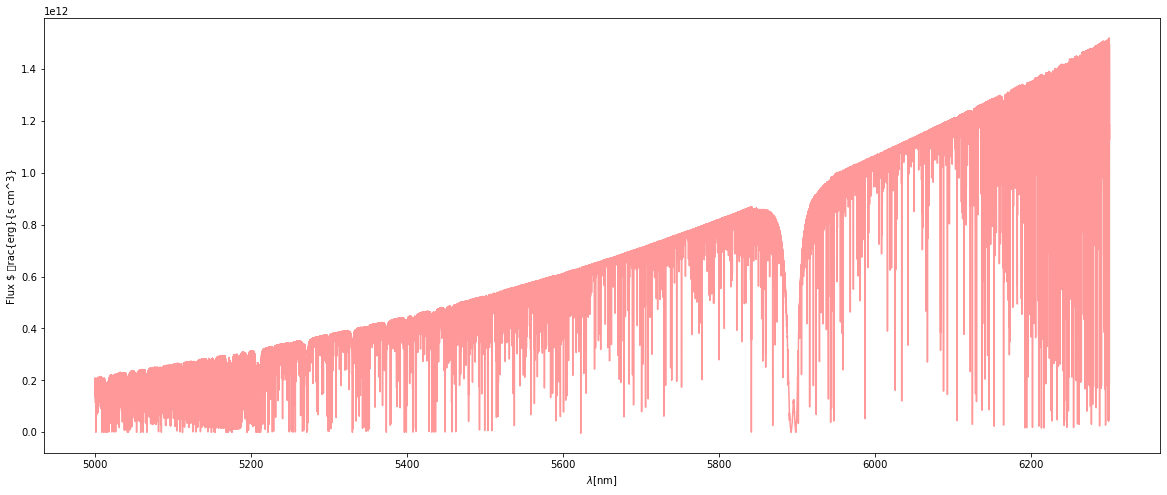

In [15]:
plt.figure(figsize=(20,8))
plt.plot(lamb_theory,flux_stellar[0,:],'-r',alpha=0.4)
plt.ylabel('Flux $ \frac{erg}{s cm^3}')
plt.xlabel('$\lambda$[nm]')
plt.show()

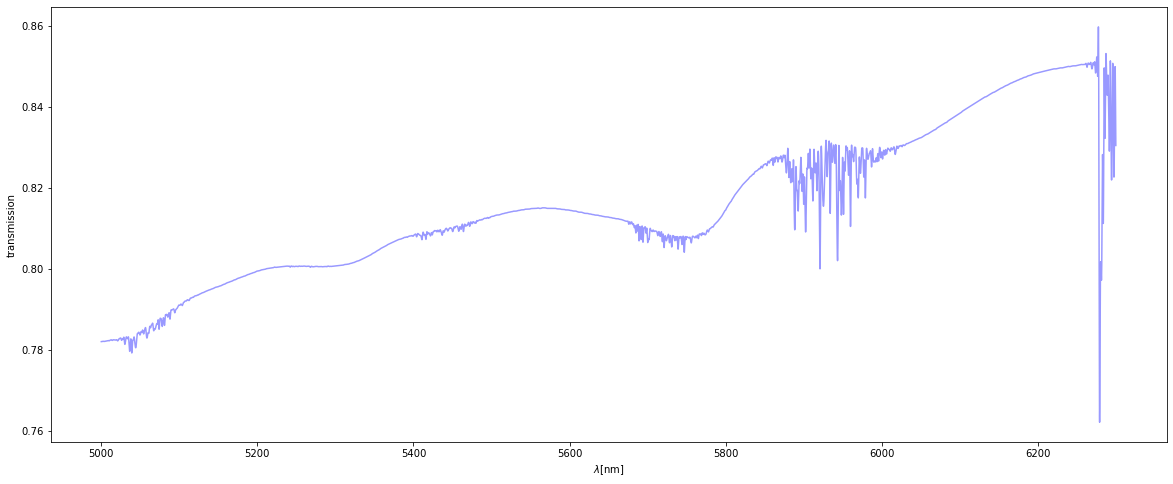

In [16]:
plt.figure(figsize=(20,8))
plt.plot(lamb_theory,flux_tellurics[0,:],'-b',alpha=0.4)
plt.ylabel('transmission')
plt.xlabel('$\lambda$[nm]')
plt.show()

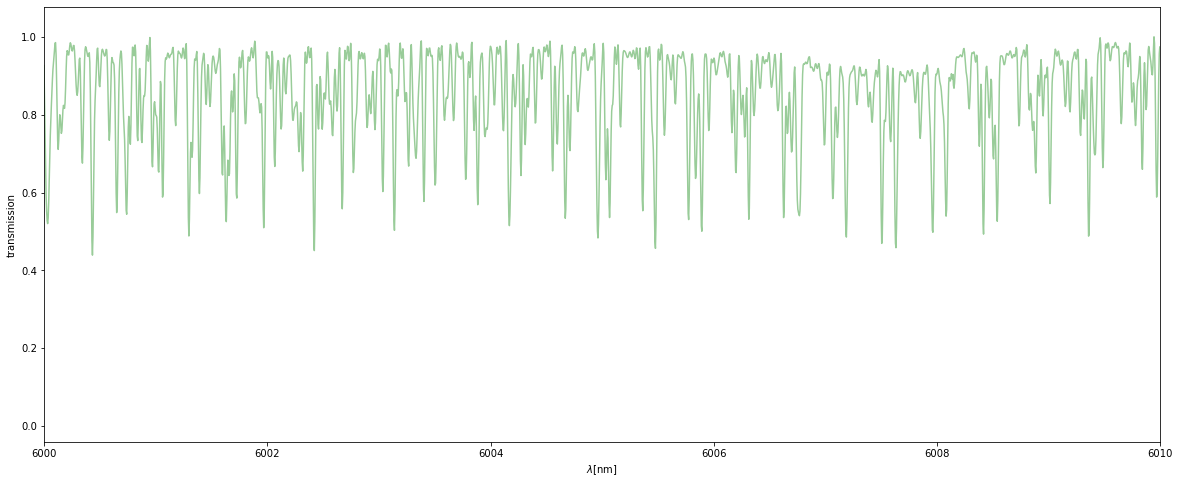

In [23]:
xmin = 6000
xmax = 6010
plt.figure(figsize=(20,8))
plt.plot(lamb_theory,flux_gas,'-g',alpha=0.4)
plt.xlim(xmin,xmax)
plt.ylabel('transmission')
plt.xlabel('$\lambda$[nm]')
plt.show()

In [18]:
print(x.shape,y.shape,yerr.shape)

(27734,) (5, 27734) (5, 27734)


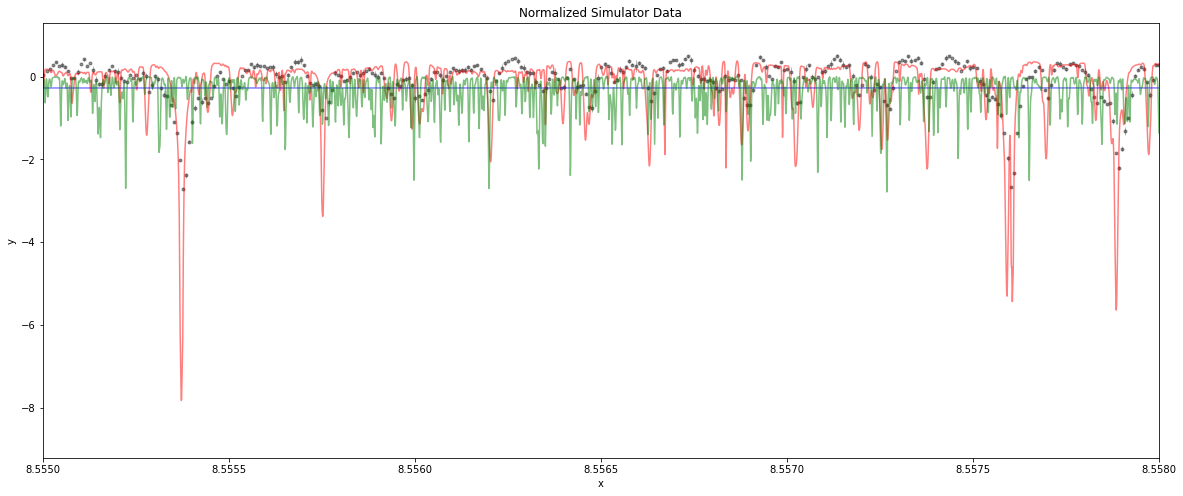

In [22]:
epoch_idx = 2
xmin = 8.555
xmax = 8.558
plot_epoch(epoch_idx,x,y,yerr,x_the,f_star=y_star,f_tell=y_tell,f_gas=y_gas)
# plt.ylim(-10,2)
plt.ylabel('y')
plt.xlabel('x')
plt.xlim(xmin,xmax)
plt.title("Normalized Simulator Data")
plt.savefig(path.join("out",'simulacra_plots',"{}_e{}_xmin{}_xmax{}.png".format(filetail,epoch_idx,xmin,xmax)))
plt.show()

<Figure size 432x288 with 0 Axes>

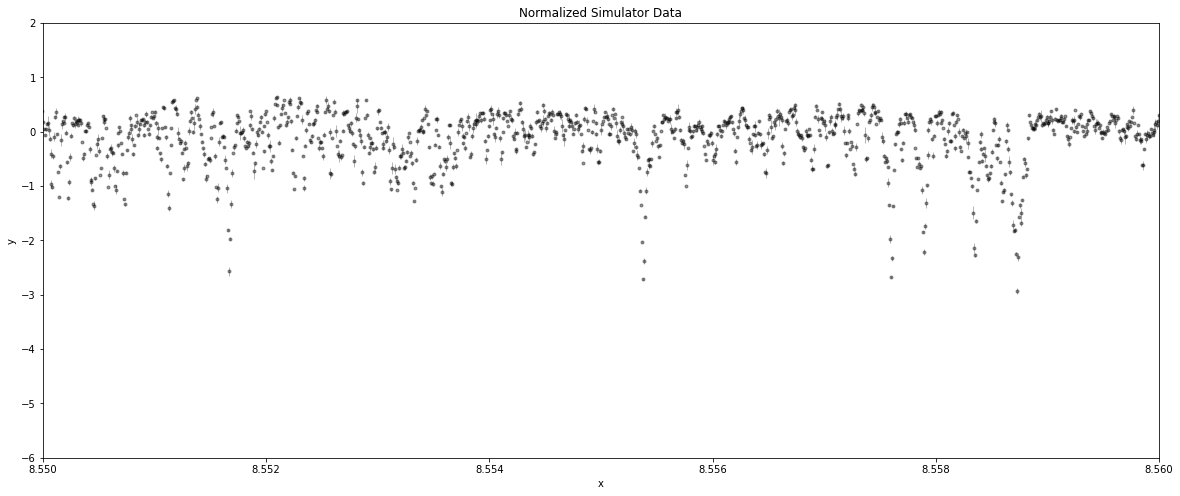

In [20]:
epoch_idx = 2
xmin = 8.55
xmax = 8.56
figure = plt.figure(facecolor='white')
plot_epoch(epoch_idx,x,y,yerr)
plt.ylim(-6,2)
plt.ylabel('y')
plt.xlabel('x')
plt.xlim(xmin,xmax)
plt.title("Normalized Simulator Data")
plt.savefig(path.join("out","{}_e{}_xmin{}_xmax{}_only_data.png".format(filetail,epoch_idx,xmin,xmax)))
plt.show()